<a href="https://colab.research.google.com/github/nathanielalbano/CNN_expressions/blob/main/Pytorch_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [ ]:
!unzip '/content/drive/MyDrive/kaggle_face_dataset.zip' -d '/content/emotions'

Streaming output truncated to the last 5000 lines.
  inflating: /content/emotions/train/train/sad/Training_65242339.jpg  
  inflating: /content/emotions/train/train/sad/Training_65267116.jpg  
  inflating: /content/emotions/train/train/sad/Training_65275626.jpg  
  inflating: /content/emotions/train/train/sad/Training_6529266.jpg  
  inflating: /content/emotions/train/train/sad/Training_65329617.jpg  
  inflating: /content/emotions/train/train/sad/Training_65338712.jpg  
  inflating: /content/emotions/train/train/sad/Training_65338797.jpg  
  inflating: /content/emotions/train/train/sad/Training_65387162.jpg  
  inflating: /content/emotions/train/train/sad/Training_65404494.jpg  
  inflating: /content/emotions/train/train/sad/Training_65426218.jpg  
  inflating: /content/emotions/train/train/sad/Training_65430136.jpg  
  inflating: /content/emotions/train/train/sad/Training_65437377.jpg  
  inflating: /content/emotions/train/train/sad/Training_6545735.jpg  
  inflating: /content/emotio

In [ ]:
batch_size = 64
num_classes = 7
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

all_transforms = transforms.Compose([transforms.Grayscale(1),
                                     transforms.Resize((48,48)),
                                     transforms.ToTensor(),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.Normalize((0.5), (0.5))])

emotions_dataset = torchvision.datasets.ImageFolder(root = '/content/emotions/train/train', transform = all_transforms)
test_emotions_dataset = torchvision.datasets.ImageFolder(root = '/content/emotions/test/test', transform = all_transforms)

train_dataset, valid_dataset = torch.utils.data.random_split(emotions_dataset, [0.8, 0.2])
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

print((f"Training length: {len(train_dataset)}; Validation length: {len(valid_dataset)}; Total: {len(emotions_dataset)} \nLabels: {classes}"))
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True, num_workers = 0)
validloader = torch.utils.data.DataLoader(valid_dataset, batch_size = batch_size, shuffle = True, num_workers = 0)
testloader = torch.utils.data.DataLoader(test_emotions_dataset, batch_size = batch_size, shuffle = True, num_workers = 0)

print((train_dataset[0][0].shape))

Training length: 22968; Validation length: 5741; Total: 28709 
Labels: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
torch.Size([1, 48, 48])


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


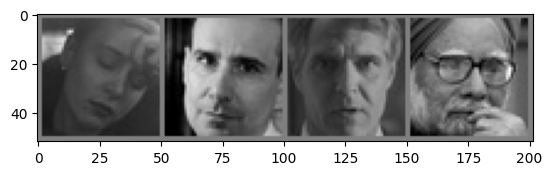

['sad' 'sad' 'sad' 'fear']


In [ ]:
##Show images
import matplotlib.pyplot as plt

def imshow(img):
  img = img/2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

data_iter = iter(trainloader)
images, labels = next(data_iter)

imshow(torchvision.utils.make_grid(images[0:4]))
print(np.array(classes)[torch.Tensor.tolist(labels)[0:4]])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
        nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size= 3),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.Conv2d(32, 64, 3),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2),
        nn.Dropout(0.25),

        nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size= 3),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size= 3),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2),
        nn.Dropout(0.25),

        nn.Conv2d(128, 256, 3),
        nn.ReLU(),
        nn.BatchNorm2d(256),
        nn.Conv2d(256, 256, 3),
        nn.ReLU(),
        nn.BatchNorm2d(256),
        nn.MaxPool2d(2),
        nn.Dropout(0.25))

        self.fc_model  = nn.Sequential(
        nn.LazyLinear(256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 7))

    def forward(self, x):
          x = self.model(x)
          x = x.view(x.size(0), -1)
          x = self.fc_model(x)

          return x

model = CNN().to(device)
print(model)

CNN(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.25, inplace=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (12): ReLU()
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Dropout(p=0.25, inplace=False)
    (16): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

val_losses = []
train_losses = []
val_acces = []
train_acces = []

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    train_loss, train_correct = 0, 0
    for batch, (input, labels) in enumerate(dataloader):
        input = input.to(device)
        labels = labels.to(device)
        # Compute prediction and loss
        pred = model(input)
        loss = loss_fn(pred, labels)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        train_loss += loss_fn(pred, labels).item()
        train_correct += (pred.argmax(1) == labels).type(torch.float).sum().item()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(input)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    train_acc = 100 * train_correct / size
    train_loss = (train_loss/len(dataloader))
    train_losses.append(round(train_loss, 6))
    train_acces.append(round(train_acc,1))
    print(f"Training Accuracy: {(train_acc):>0.1f}%, Avg loss: {(train_loss):>8f}")


def valid(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    val_loss, correct = 0, 0
    with torch.no_grad():
        for input, labels in dataloader:
            input, labels = input.to(device), labels.to(device)
            pred = model(input)
            val_loss += loss_fn(pred, labels).item()
            correct += (pred.argmax(1) == labels).type(torch.float).sum().item()
    val_loss /= num_batches
    correct /= size
    val_acc = (100*correct)
    val_losses.append(round(val_loss, 6))
    val_acces.append(round(val_acc, 1))
    print(f"Validation Error: \n Accuracy: {(val_acc):>0.1f}%, Avg loss: {val_loss:>8f} \n")

In [ ]:
epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(trainloader, model, loss_fn, optimizer)
    valid(validloader, model, loss_fn)
print("Done!")
torch.save(model.state_dict(), "/content/saved_model")

Epoch 1
-------------------------------
loss: 2.133271  [   64/22968]
loss: 1.844322  [ 6464/22968]
loss: 1.541085  [12864/22968]
loss: 1.634916  [19264/22968]
Training Accuracy: 30.5%, Avg loss: 1.732836
Validation Error: 
 Accuracy: 37.8%, Avg loss: 1.563871 

Epoch 2
-------------------------------
loss: 1.520082  [   64/22968]
loss: 1.746815  [ 6464/22968]
loss: 1.453649  [12864/22968]
loss: 1.493512  [19264/22968]
Training Accuracy: 40.6%, Avg loss: 1.530411
Validation Error: 
 Accuracy: 45.4%, Avg loss: 1.412502 

Epoch 3
-------------------------------
loss: 1.515235  [   64/22968]
loss: 1.360109  [ 6464/22968]
loss: 1.591791  [12864/22968]
loss: 1.542896  [19264/22968]
Training Accuracy: 45.2%, Avg loss: 1.428098
Validation Error: 
 Accuracy: 49.1%, Avg loss: 1.339123 

Epoch 4
-------------------------------
loss: 1.383437  [   64/22968]
loss: 1.420769  [ 6464/22968]
loss: 1.404305  [12864/22968]
loss: 1.322141  [19264/22968]
Training Accuracy: 47.8%, Avg loss: 1.357868
Valida

KeyboardInterrupt: 

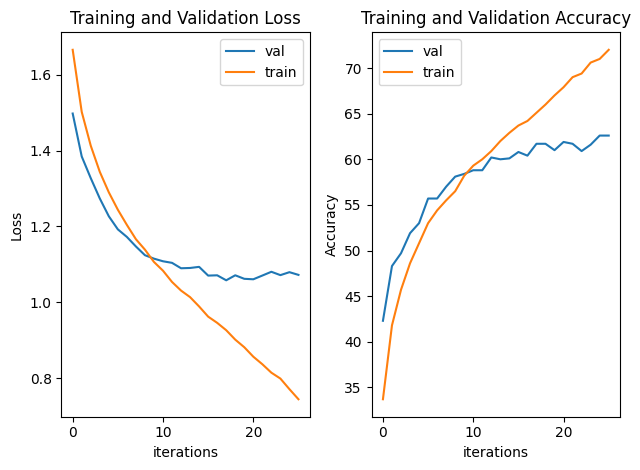

Validation Error: 
 Accuracy: 62.1%, Avg loss: 1.070354 



In [ ]:
##Validaiton and Accuracy plots
plt.subplot(1,2,1)
plt.title("Training and Validation Loss")
plt.plot(val_losses,label="val")
plt.plot(train_losses,label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.title("Training and Validation Accuracy")
plt.plot(val_acces,label="val")
plt.plot(train_acces,label="train")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

##Final Test Accuracy and Loss Scores:
model.eval()
valid(testloader, model, loss_fn)

Predicted emotion: angry


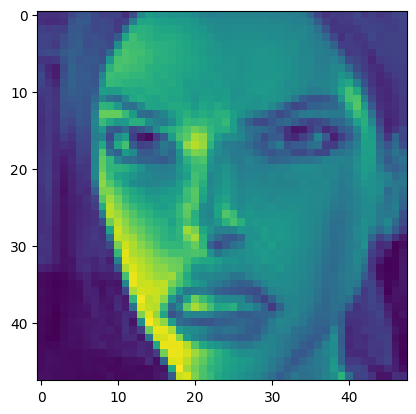

In [ ]:
##Image Inference
from PIL import Image
img = Image.open('/content/emotions/train/train/angry/Training_10269675.jpg')
plt.imshow(img)
img = all_transforms(img)
img = img.to(device)
model.eval()
output = model(img.unsqueeze(0))
prediction = torch.argmax(output)
print(f"Predicted emotion: {classes[prediction.item()]}")
